In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('MNIST_train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


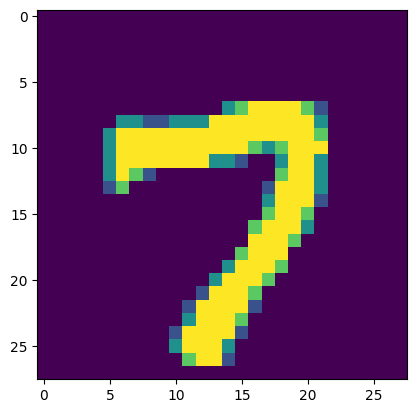

In [4]:
#visualising our dataset using matplotlib
image=df.iloc[41997,1:]
image
plt.imshow(np.array(image).reshape(28,28))

In [5]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [7]:
ypred=dtree.predict(xtest)
ypred

array([3, 6, 9, ..., 8, 7, 2], dtype=int64)

0.853452380952381

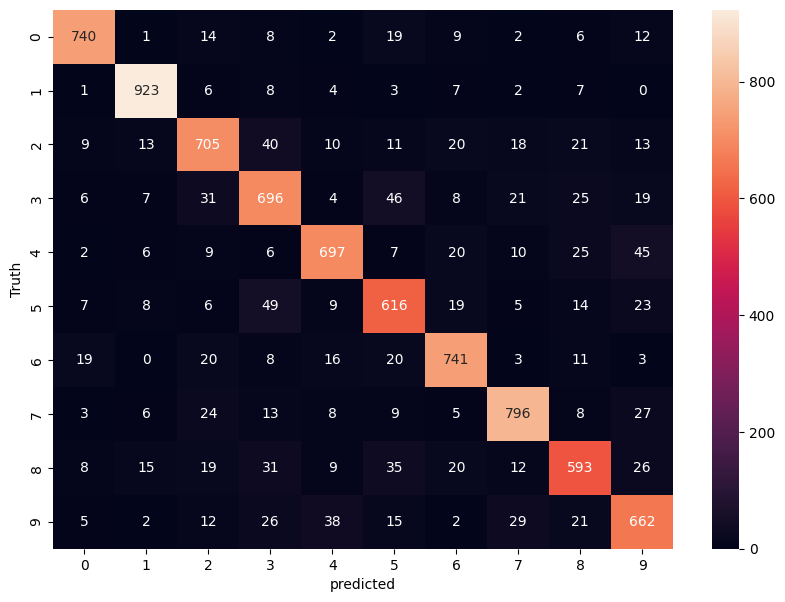

In [8]:
from sklearn.metrics import confusion_matrix
cmdtree=confusion_matrix(ytest,ypred)
cmdtree
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmdtree,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
dtree.score(xtest,ytest)

In [9]:
cmdtree

array([[740,   1,  14,   8,   2,  19,   9,   2,   6,  12],
       [  1, 923,   6,   8,   4,   3,   7,   2,   7,   0],
       [  9,  13, 705,  40,  10,  11,  20,  18,  21,  13],
       [  6,   7,  31, 696,   4,  46,   8,  21,  25,  19],
       [  2,   6,   9,   6, 697,   7,  20,  10,  25,  45],
       [  7,   8,   6,  49,   9, 616,  19,   5,  14,  23],
       [ 19,   0,  20,   8,  16,  20, 741,   3,  11,   3],
       [  3,   6,  24,  13,   8,   9,   5, 796,   8,  27],
       [  8,  15,  19,  31,   9,  35,  20,  12, 593,  26],
       [  5,   2,  12,  26,  38,  15,   2,  29,  21, 662]], dtype=int64)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier(n_estimators=50)
rforest.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=50)

In [11]:
ypred=rforest.predict(xtest)
ypred

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

0.9608333333333333

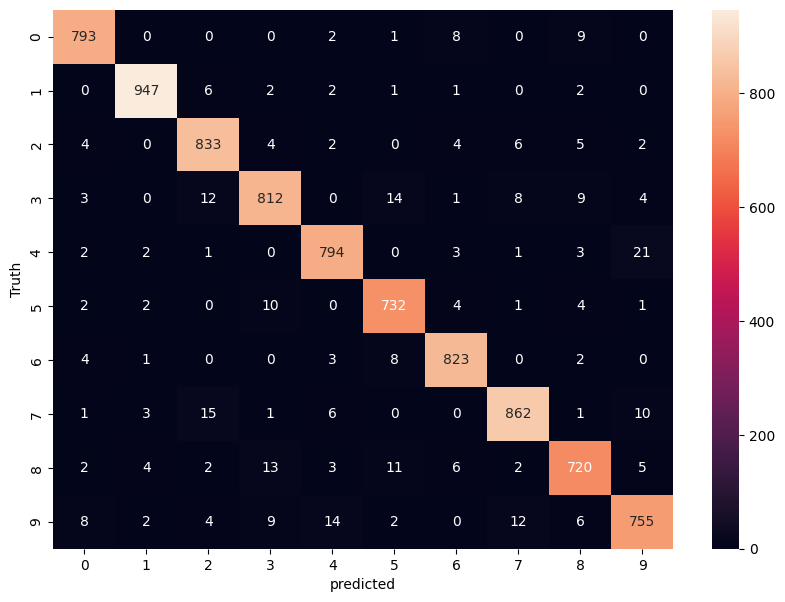

In [12]:
cmrforest=confusion_matrix(ytest,ypred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmrforest,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

from sklearn.metrics import accuracy_score
accuracy_score(ypred,ytest)